In [1]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

In [2]:
#setting the constants to a variable for ease of coding
k1 = 1.7e-3
k2 = 3.1e-3
k3 = 1.2e-3
k4 = 6.2e-3 

# Define the function that defines the ODE

def rateFunction(t,y):
    f = numpy.array([-k1*y[0], k1*y[0] - k2*y[1], k2*y[1] - k3*y[2], k3*y[2] - k4*y[3]])
    return(f)

The approximation of PCE is 0.004407338151513994.
The approximation of TCE is 0.0026398090668185437.
The approximation of cDCE is 0.0023765553818070172.
The approximation of TCA is 0.00029220341211139454.


Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

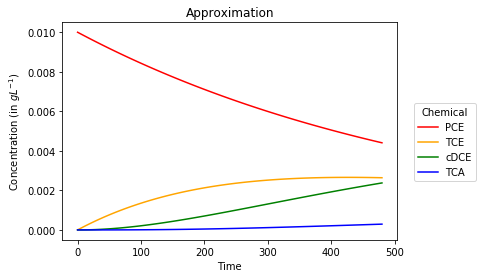

In [3]:
#first order explicit Euler's

# Define the basic parameters
N = 101     # The number of steps
startTime = 0.0    # The initial time
endTime = 20.0*24.0   # The time to stop the approximation
initialY  = 0      # The initial value

# Define the variables that are used in the approximation.
dt = (endTime-startTime)/float(N)
time = numpy.linspace(startTime,endTime,N+1)
y = numpy.zeros((4 , N+1))
y[:, 0] = numpy.array([.01, 0, 0, 0])

for lupe in range(1,N+1):
    y[:, lupe] = y[:, lupe-1] + dt*rateFunction(time[lupe-1],y[:, lupe-1])
    
# Print out the results at the final time.
print("The approximation of PCE is {1}.".format(time[N],y[0, N]))
print("The approximation of TCE is {1}.".format(time[N],y[1, N]))
print("The approximation of cDCE is {1}.".format(time[N],y[2, N]))
print("The approximation of TCA is {1}.".format(time[N],y[3, N]))


# Make a plot of the approximation and the true value.
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

#true_time = numpy.linspace(startTime,endTime,200)
plt1 = axes.plot(time, y[0, :], 'r', label = 'PCE')
plt2 = axes.plot(time, y[1, :],'orange', label = "TCE")
plt3 = axes.plot(time, y[2, :],'g', label = "cDCE")
plt3 = axes.plot(time, y[3, :],'b', label = "TCA")
plt.legend(title = "Chemical", bbox_to_anchor=(1.25, .65))
plt.title("Approximation")
plt.xlabel("Time")
plt.ylabel("Concentration (in $gL^{-1}$)")

Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

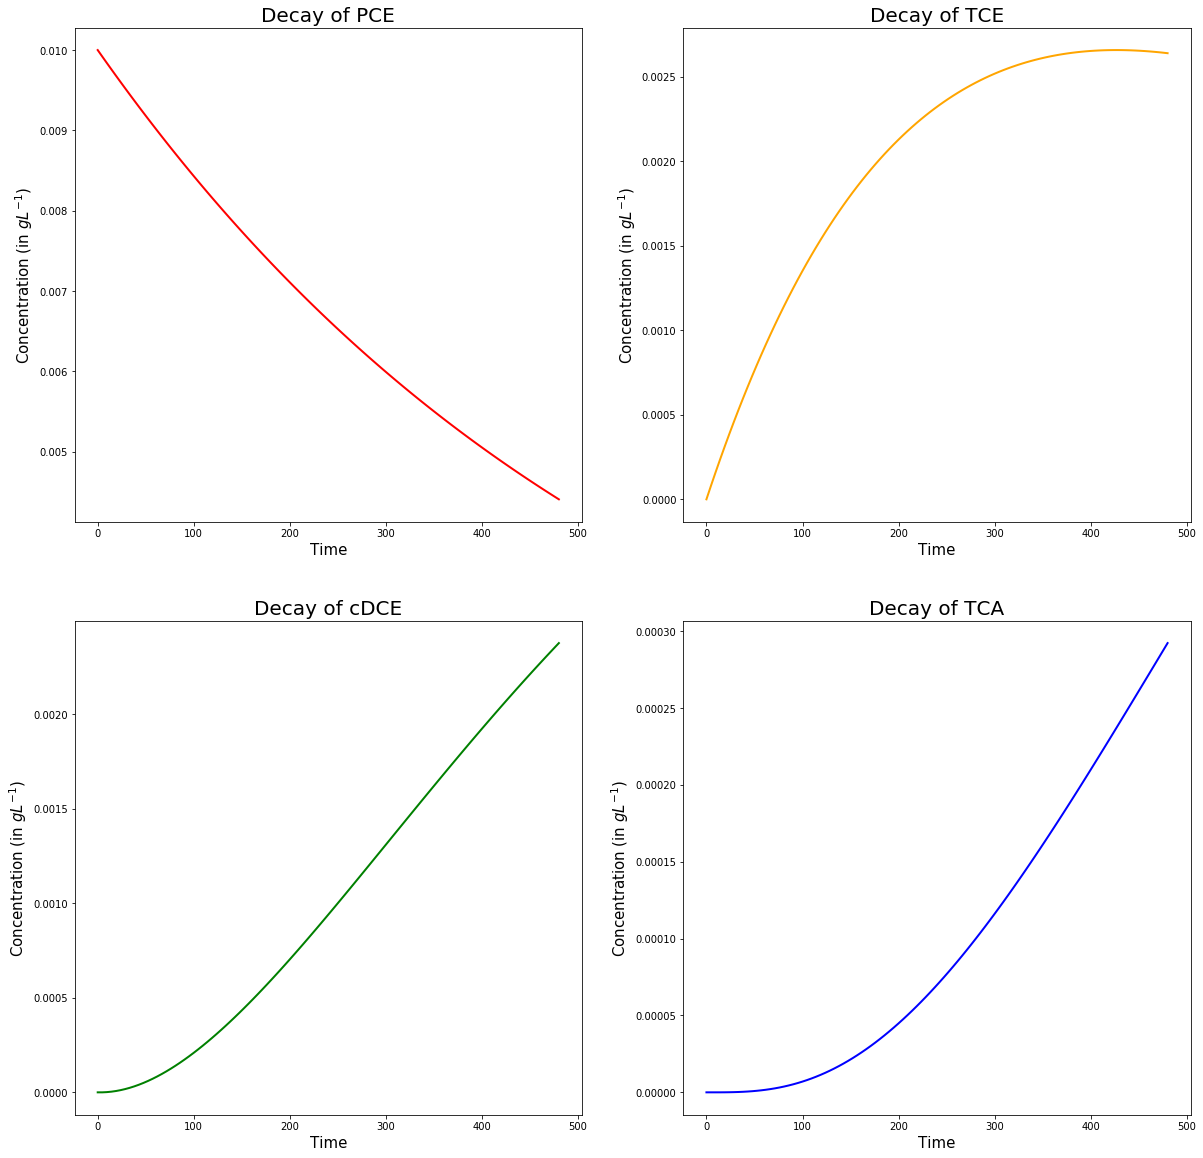

In [4]:
#Individual plots for 1st order Euler's

plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.plot(time, y[0, :], 'r', linewidth = 2)
plt.title("Decay of PCE", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

plt.subplot(222)
plt.plot(time, y[1, :], 'orange', linewidth = 2)
plt.title("Decay of TCE", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

plt.subplot(223)
plt.plot(time, y[2, :], 'g', linewidth = 2)
plt.title("Decay of cDCE", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

plt.subplot(224)
plt.plot(time, y[3, :], 'b', linewidth = 2)
plt.title("Decay of TCA", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

In [8]:
#setting the constants to a variable for ease of coding
k1 = 1.7e-3
k2 = 3.1e-3
k3 = 1.2e-3
k4 = 6.2e-3 

# Define the function that defines the ODE

def rateFunction(t,y):
    f = numpy.array([-k1*y[0], k1*y[0] - k2*y[1], k2*y[1] - k3*y[2], k3*y[2] - k4*y[3]])
    return(f)

The approximation of PCE is 0.00966571505270837.
The approximation of TCE is 0.00032407603618529534.
The approximation of cDCE is 1.0127086566085348e-05.
The approximation of TCA is 7.933566166620952e-08.


Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

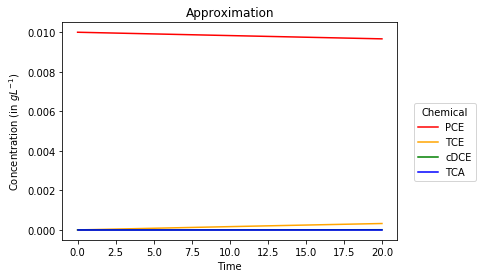

In [9]:
#2nd order Runge-Kutta

# Define the basic parameters
N = 100     # The number of steps
startTime = 0.0    # The initial time
endTime = 20.0   # The time to stop the approximation
initialY  = 0.0      # The initial value

# Define the variables that are used in the approximation.
dt = (endTime-startTime)/float(N)
time = numpy.linspace(startTime,endTime,N+1)
y = numpy.zeros((4 , N+1))
y[:, 0] = numpy.array([.01, 0, 0, 0])

# Now use a second order, explicit RK method to determine the approximation
# at the rest of the grid points.
for lupe in range(1,N+1):
    
    xi_1 = numpy.array([y[0, lupe - 1], y[1, lupe - 1], y[2, lupe - 1], y[3, lupe - 1]])
    f_1 = rateFunction(time[lupe - 1], xi_1)
    
    xi_2 = xi_1 + dt*f_1
    f_2  = rateFunction(time[lupe-1]+dt,xi_2)
    
    y[:,lupe] = y[:, lupe-1] + dt*0.5*(f_1+f_2)
    
# Print out the results at the final time.

print("The approximation of PCE is {1}.".format(time[N],y[0, N]))
print("The approximation of TCE is {1}.".format(time[N],y[1, N]))
print("The approximation of cDCE is {1}.".format(time[N],y[2, N]))
print("The approximation of TCA is {1}.".format(time[N],y[3, N]))


# Make a plot of the approximation and the true value.
fig = plt.figure()
axes = fig.add_subplot(1, 1, 1)

#true_time = numpy.linspace(startTime,endTime,200)
plt1 = axes.plot(time, y[0, :], 'r', label = 'PCE')
plt2 = axes.plot(time, y[1, :],'orange', label = "TCE")
plt3 = axes.plot(time, y[2, :],'g', label = "cDCE")
plt3 = axes.plot(time, y[3, :],'b', label = "TCA")
plt.legend(title = "Chemical", bbox_to_anchor=(1.25, .65))
plt.title("Approximation")
plt.xlabel("Time")
plt.ylabel("Concentration (in $gL^{-1}$)")

Text(0, 0.5, 'Concentration (in $gL^{-1}$)')

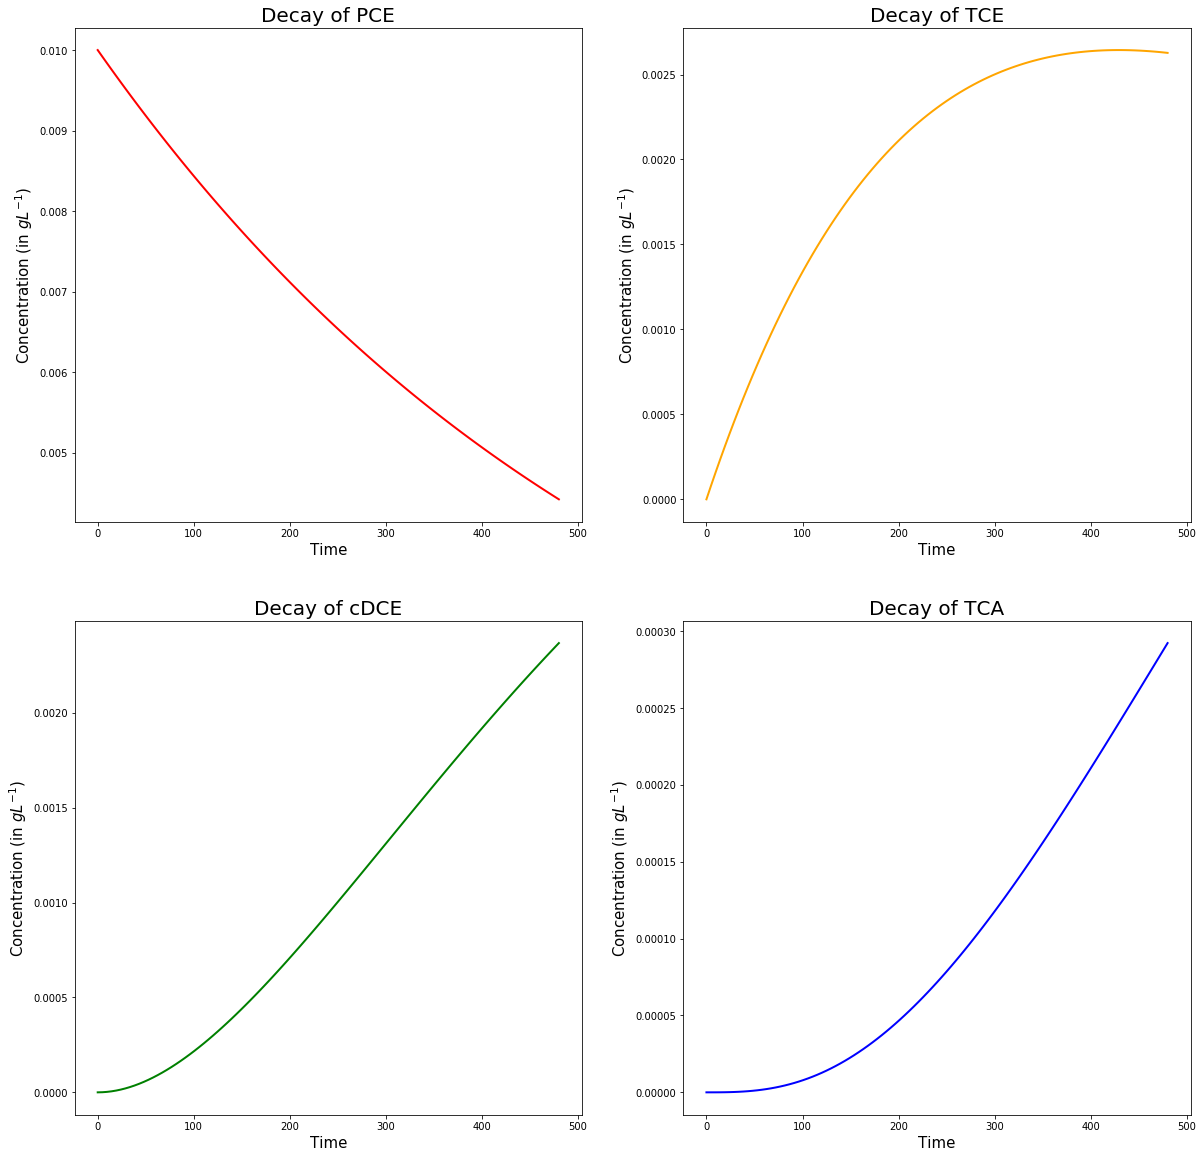

In [6]:
#Individual plots for 2nd order RK

plt.figure(figsize=(20, 20))

plt.subplot(221)
plt.plot(time, y[0, :], 'r', linewidth = 2)
plt.title("Decay of PCE", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

plt.subplot(222)
plt.plot(time, y[1, :], 'orange', linewidth = 2)
plt.title("Decay of TCE", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

plt.subplot(223)
plt.plot(time, y[2, :], 'g', linewidth = 2)
plt.title("Decay of cDCE", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

plt.subplot(224)
plt.plot(time, y[3, :], 'b', linewidth = 2)
plt.title("Decay of TCA", fontsize = 20)
plt.xlabel("Time", fontsize = 15)
plt.ylabel("Concentration (in $gL^{-1}$)", fontsize = 15)

In [24]:
# Define the basic parameters
N = 100     # The number of steps
startTime = 0.0    # The initial time
endTime = 20.0*24.0   # The time to stop the approximation
initialY  = 0      # The initial value

# Define the variables that are used in the approximation.
dt = (endTime-startTime)/float(N)
time = numpy.linspace(startTime,endTime,N+1)
y = numpy.zeros((4 , N+1))
y[:, 0] = numpy.array([.01, 0, 0, 0])
error_trun = numpy.zeros((4, N + 1))
error_trun[:, 0] = numpy.array([0, 0, 0, 0])

# Now use a second order, explicit RK method to determine the approximation
# at the rest of the grid points.
for lupe in range(1,N+1):
    
    xi_1 = numpy.array([y[0, lupe - 1], y[1, lupe - 1], y[2, lupe - 1], y[3, lupe - 1]])
    f_1 = rateFunction(time[lupe - 1], xi_1)
    
    xi_2 = xi_1 + dt*f_1
    f_2  = rateFunction(time[lupe-1]+dt,xi_2)
    
    y[:,lupe] = y[:, lupe-1] + dt*0.5*(f_1+f_2)
    
for i in range(1, N+1):
    error_trun[:, i] = y[:, i] - y[:, i - 1]
    
# Print out the results at the final time.

print("The approximation of PCE is {1}.".format(time[N],y[0, N]))
print("The final truncation error is {0}\n".format(abs(error_trun[0, N])))
print("The approximation of TCE is {1}.".format(time[N],y[1, N]))
print("The final truncation error is {0}\n".format(abs(error_trun[1, N])))
print("The approximation of cDCE is {1}.".format(time[N],y[2, N]))
print("The final truncation error is {0}\n".format(abs(error_trun[2, N])))
print("The approximation of TCA is {1}.".format(time[N],y[3, N]))
print("The final truncation error is {0}".format(abs(error_trun[3, N])))


The approximation of PCE is 0.00442200938261754.
The final truncation error is 3.623081269457217e-05

The approximation of TCE is 0.0026272837806997013.
The final truncation error is 2.8855904064396636e-06

The approximation of cDCE is 0.002367076127266741.
The final truncation error is 2.555537224126908e-05

The approximation of TCA is 0.00029222149234014994.
The final truncation error is 4.938002676244384e-06
